# Setup and Visualize

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [177]:
data = np.loadtxt("ex2data1.txt", delimiter=",")

In [178]:
X, y = data[:,:2], data[:,2]

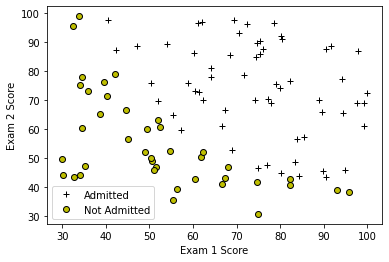

In [179]:
plt.plot(X[y==1,0], X[y==1,1], 'k+')
plt.plot(X[y==0,0], X[y==0,1], 'ko', mfc='y')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted','Not Admitted'])

# Sigmoid Function

In [180]:
def sigmoid(z):
    if isinstance(z, list):
        z = np.array(z)
    return 1 / (1 + np.exp(-z))

In [181]:
#looks good
sigmoid([0,0,3])

array([0.5       , 0.5       , 0.95257413])

# Cost Function and Gradient

In [182]:
# cost function for logistic regression
def costFunction(theta, X, y):
    m = y.size

    h = sigmoid(np.dot(X, theta))
    J = (1/m) * np.sum(np.dot(-y, np.log(h)) - np.dot((1-y),np.log(1-h)))
    grad = (1/m) * np.dot((h - y),X)
    
    return J, grad

In [183]:
# get dimensions 
m, n = X.shape

In [184]:
# add intercept to X
X = np.concatenate([np.ones((m,1)), X], axis=1)

In [185]:
# test
initial_theta = np.zeros((n+1, 1))

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693



In [186]:
# everything matches Matlab
print('Gradient at initial theta (zeros):')
grad[1,:]

Gradient at initial theta (zeros):


array([ -0.1       , -12.00921659, -11.26284221])

# Optimization

In [187]:
# use the scipy optimizer library
options = {'maxiter': 400}
res = optimize.minimize(costFunction, initial_theta, (X, y), jac=True, method='TNC', options=options)

cost = res.fun
theta = res.x

print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203



In [188]:
print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


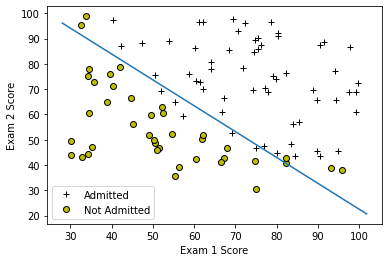

In [214]:
# plot decision boundary
plt.plot(X[y==1,1], X[y==1,2], 'k+')
plt.plot(X[y==0,1], X[y==0,2], 'ko', mfc='y')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted','Not Admitted'])

plot_x = np.array([np.min(X[:,1]) -2, np.max(X[:,1]) + 2])
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y)

In [205]:
def predict(theta, X):
    return np.round(sigmoid(np.dot(X, theta)))

In [206]:
# make predictions and check accuracy
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


# Regularized Logistic Regression

In [238]:
data2 = np.loadtxt("ex2data2.txt", delimiter=",")

In [239]:
X2, y2 = data2[:, :2], data2[:, 2]

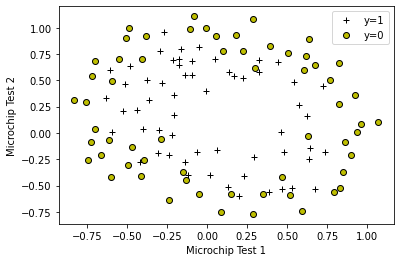

In [240]:
# plot the data
plt.plot(X2[y2==1,0], X2[y2==1,1], 'k+')
plt.plot(X2[y2==0,0], X2[y2==0,1], 'ko', mfc='y')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'])

In [226]:
def mapFeature(X1, X2, degree=6):
    """Function to add higher order polynomials to the data
    """
    out = [np.ones(X1.shape[0])]

    for i in range(0, degree):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))
    return np.stack(out, axis=1)

In [261]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.
    degree: int, optional
        The polynomial degree.
    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [241]:
X2 = mapFeature(X2[:,0], X2[:,1])

In [235]:
# regularized cost function for logistic regression
def costFunctionReg(theta, X, y, lambda_):
    m = y.size

    theta_tmp = theta
    theta_tmp[0] = 0

    h = sigmoid(np.dot(X, theta))

    J = (1/m) * np.sum(np.dot(-y, np.log(h)) - np.dot((1-y),np.log(1-h))) + lambda_ / (2*m) * np.sum(np.square(theta_tmp))

    grad = (1/m) * np.dot((h - y),X) + (lambda_ / m) * theta_tmp

    return J, grad

In [242]:
# test cost function
initial_theta = np.zeros(X2.shape[1])
lambda_ = 1

cost, grad = costFunctionReg(initial_theta, X2, y2, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693



# Regularized Optimization

In [248]:
res2 = optimize.minimize(costFunctionReg, initial_theta, (X2, y2, lambda_), jac=True, method='TNC', options=options)

cost = res2.fun
theta = res2.x

p = predict(theta, X2)

print('Train Accuracy: %.1f %%' % (np.mean(p == y2) * 100))

Train Accuracy: 81.4 %
